<a href="https://colab.research.google.com/github/hyu4/NSDC/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### all required packages
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
import patsy

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sns.set_style()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install skfeature-chappers

In [ ]:
%run -i '/content/EDA_Statsmodels_Functions.py'
%run -i 'Feature_Engineering_Functions.py'
%run -i '/content/Models_Functions.py'

In [ ]:
# %run -i '/content/drive/MyDrive/Colab Notebooks/EDA_Statsmodels_Functions.py'
# %run -i '/content/drive/MyDrive/Colab Notebooks/Feature_Engineering_Functions.py'
# %run -i '/content/drive/MyDrive/Colab Notebooks/Models_Functions.py'

In [ ]:
creditScore_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

<ipython-input-6-7fae9a8a7fe2>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  creditScore_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")


In [ ]:
creditScore_data.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [ ]:
creditScore_data.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [ ]:
creditScore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
creditScore_data.columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [ ]:
creditScore_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<Axes: xlabel='Credit_Score', ylabel='count'>

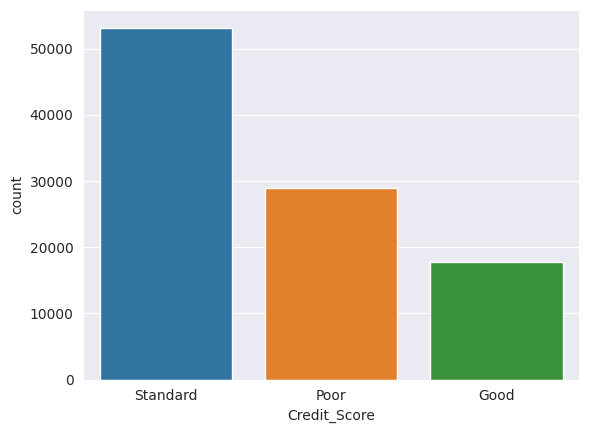

In [ ]:
sequence = creditScore_data.Credit_Score.value_counts()
sns.barplot(x = sequence.index, y = sequence, hue = sequence.index)

In [ ]:
creditScore_d = creditScore_data.drop(["ID", "Customer_ID","Month",
                                       "Name","SSN", "Occupation",
                                       "Type_of_Loan", "Age"], axis = 1)

In [ ]:
numerical_variables, categorical_variables = split_types(creditScore_d)

In [ ]:

numerical_variables.head()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1                    NaN                  3                4              3   
2                    NaN                  3                4              3   
3                    NaN                  3                4              3   
4            1824.843333                  3                4              3   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0                    3                   4.0                 26.822620   
1                   -1                   4.0                 31.944960   
2                    3                   4.0                 28.609352   
3                    5                   4.0                 31.377862   
4                    6                   4.0                 24.797347   

   Total_EMI_per_month Annual_Income Num_of_Loan Num_of_Delayed_Payment  \
0            49.574949      19114.12           4                      7   
1            49.574949      19114.12           4                    NaN   
2            49.574949      19114.12           4                      7   
3            49.574949      19114.12           4                      4   
4            49.574949      19114.12           4                    NaN   

  Changed_Credit_Limit Outstanding_Debt Amount_invested_monthly  \
0                11.27           809.98       80.41529543900253   
1                11.27           809.98      118.28022162236736   
2                    _           809.98         81.699521264648   
3                 6.27           809.98       199.4580743910713   
4                11.27           809.98      41.420153086217326   

      Monthly_Balance  
0  312.49408867943663  
1  284.62916249607184  
2   331.2098628537912  
3  223.45130972736786  
4  341.48923103222177

In [ ]:
numerical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Monthly_Inhand_Salary     84998 non-null   float64
 1   Num_Bank_Accounts         100000 non-null  int64  
 2   Num_Credit_Card           100000 non-null  int64  
 3   Interest_Rate             100000 non-null  int64  
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_Credit_Inquiries      98035 non-null   float64
 6   Credit_Utilization_Ratio  100000 non-null  float64
 7   Total_EMI_per_month       100000 non-null  float64
 8   Annual_Income             100000 non-null  object 
 9   Num_of_Loan               100000 non-null  object 
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Amount_invested_monthly   95521 non-null   ob

In [ ]:
numerical_variables.isnull().sum()

Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Delay_from_due_date             0
Num_Credit_Inquiries         1965
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Annual_Income                   0
Num_of_Loan                     0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Outstanding_Debt                0
Amount_invested_monthly      4479
Monthly_Balance              1200
dtype: int64

In [ ]:
categorical_variables.head()

Credit_Mix     Credit_History_Age Payment_of_Min_Amount  \
0          _  22 Years and 1 Months                    No   
1       Good                    NaN                    No   
2       Good  22 Years and 3 Months                    No   
3       Good  22 Years and 4 Months                    No   
4       Good  22 Years and 5 Months                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good

In [ ]:
categorical_variables.isnull().sum()

Credit_Mix                  0
Credit_History_Age       9030
Payment_of_Min_Amount       0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [ ]:
count_uniques(categorical_variables)

count
Credit_Mix                 4
Credit_History_Age       404
Payment_of_Min_Amount      3
Payment_Behaviour          7
Credit_Score               3

In [ ]:
df = check_uniques(categorical_variables)
print(df.to_string())

                                                        Count
Variables             Value                                  
Credit_Mix            Standard                          36479
                      Good                              24337
                      _                                 20195
                      Bad                               18989
Credit_History_Age    15 Years and 11 Months              446
                      19 Years and 4 Months               445
                      19 Years and 5 Months               444
                      17 Years and 11 Months              443
                      19 Years and 3 Months               441
                      17 Years and 9 Months               438
                      15 Years and 10 Months              436
                      17 Years and 10 Months              435
                      15 Years and 9 Months               432
                      18 Years and 3 Months               428
        

The following check_nonNumerical() will check if a column contains non-numerical values including NaNs and returns corresponding rows of it as a data frame

In [ ]:
checkDf = check_nonNumerical(numerical_variables, "Monthly_Inhand_Salary")
checkDf

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
1                        NaN                  3                4   
2                        NaN                  3                4   
3                        NaN                  3                4   
5                        NaN                  3                4   
11                       NaN                  2                4   
...                      ...                ...              ...   
99944                    NaN                  2                5   
99955                    NaN                  4                4   
99963                    NaN                  0                4   
99975                    NaN                  1                1   
99978                    NaN                  1                4   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
1                  3                   -1                   4.0   
2                  3                    3                   4.0   
3                  3                    5                   4.0   
5                  3                    8                   4.0   
11                 6                    3                   2.0   
...              ...                  ...                   ...   
99944              6                    8                   2.0   
99955              3                   11                   3.0   
99963              6                   14                   1.0   
99975              5                    1                   8.0   
99978              5                    4                   3.0   

       Credit_Utilization_Ratio  Total_EMI_per_month Annual_Income  \
1                     31.944960            49.574949      19114.12   
2                     28.609352            49.574949      19114.12   
3                     31.377862            49.574949      19114.12   
5                     27.262259            49.574949      19114.12   
11                    39.182656            18.816215      34847.84   
...                         ...                  ...           ...   
99944                 34.720661            26.778419      59146.36   
99955                 35.455305           362.072453      38321.39   
99963                 30.625298            34.975457      42903.79   
99975                 41.212367            41.113561      16680.35   
99978                 24.540510            84.205949       37188.1   

      Num_of_Loan Num_of_Delayed_Payment Changed_Credit_Limit  \
1               4                    NaN                11.27   
2               4                      7                    _   
3               4                      4                 6.27   
5               4                      4                 9.27   
11              1                     3_                 5.42   
...           ...                    ...                  ...   
99944           1                      6                 6.68   
99955           4                      7                 1.59   
99963           1                      0                  5.1   
99975           4                      0                 5.69   
99978           3                     11                 5.38   

      Outstanding_Debt Amount_invested_monthly     Monthly_Balance  
1               809.98      118.28022162236736  284.62916249607184  
2               809.98         81.699521264648   331.2098628537912  
3               809.98       199.4580743910713  223.45130972736786  
5               809.98      62.430172331195294   340.4792117872438  
11              605.03       99.30622796053305   465.6762241330048  
...                ...                     ...                 ...  
99944           418.03       606.4365424304076          147.671372  
99955           678.57      293.71319332766717          197.460577  
99963          1079.48       31.19391926667726          520.662207  
99975           897.16        70.8055497847255          310.883806  
9997

## Defining data-cleaning functions

The function date_extracter() converts the credit history age from years and months to only months

In [ ]:
def date_extracter(data):
  internal = data.to_list()
  # print(internal)
  for i in range(len(internal)):
    try:
      year_month = re.findall('[0-9]+',internal[i])
      final_time = float(year_month[0])*12 + float(year_month[1])
      data[i] = final_time
    except:
        # Handle the case where the year or month string is empty
      data[i] = np.nan

The negative_remover() removes any values that is negative from the numerical variables.

In [ ]:
def negative_remover(data):
  data[data < 0] = data.median()

The outlier_remover() removes outliers based on a percentile.

In [ ]:
def outlier_remover(data,percentile):
  upper_limit = data.quantile(percentile)
  data[data > upper_limit] = data.median()

## Cleaning numerical data...

In [ ]:
#cleaning numerical dataframe
numerical_variables = numerical_variables[:].apply(pd.to_numeric, errors='coerce')
replacement = dict(numerical_variables.median(skipna = True))

numerical_variables = numerical_variables.fillna(replacement)
numerical_variables.apply(negative_remover,axis=0)

numerical_variables.apply(outlier_remover,args = (0.97,))
numerical_variables.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count          100000.000000      100000.000000    100000.000000   
mean             3732.660871           5.376960         5.519050   
std              2502.849428           2.575548         2.043012   
min               303.645417           0.000000         0.000000   
25%              1792.084167           3.000000         4.000000   
50%              3093.745000           6.000000         5.000000   
75%              4980.395000           7.000000         7.000000   
max             11457.170000          10.000000        10.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000         100000.000000   
mean       14.500450            19.961590              5.712190   
std         8.653109            13.110483              3.678311   
min         1.000000             0.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            27.000000              8.000000   
max        34.000000            57.000000             15.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  Annual_Income  \
count             100000.000000        100000.000000  100000.000000   
mean                  31.985296           110.141701   46846.176064   
std                    4.798619           170.595885   32932.641456   
min                   20.000000             0.000000    7005.930000   
25%                   28.052567            30.306660   20062.860000   
50%                   32.305730            69.248079   37550.740000   
75%                   36.000738           143.576460   64815.640000   
max                   40.926961          4655.000000  146999.240000   

         Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count  100000.000000           100000.000000         100000.000000   
mean        3.485520               13.400240              9.990584   
std         2.338424                5.750487              5.727014   
min         0.000000                0.000000              0.000000   
25%         2.000000               10.000000              5.760000   
50%         3.000000               14.000000              9.400000   
75%         5.000000               18.000000             13.590000   
max         9.000000               25.000000             25.910000   

       Outstanding_Debt  Amount_invested_monthly  Monthly_Balance  
count     100000.000000            100000.000000    100000.000000  
mean        1317.434599               165.251088       378.584330  
std          992.797808               133.424630       171.396575  
min            0.230000                 0.000000         0.007760  
25%          571.650000                77.017414       270.913865  
50%         1166.370000               128.954538       336.731225  
75%         1734.870000               200.906335       443.574293  
max         4445.090000               711.606801       960.621640

In [ ]:
numerical_variables.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count          100000.000000      100000.000000    100000.000000   
mean             3732.660871           5.376960         5.519050   
std              2502.849428           2.575548         2.043012   
min               303.645417           0.000000         0.000000   
25%              1792.084167           3.000000         4.000000   
50%              3093.745000           6.000000         5.000000   
75%              4980.395000           7.000000         7.000000   
max             11457.170000          10.000000        10.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000         100000.000000   
mean       14.500450            19.961590              5.712190   
std         8.653109            13.110483              3.678311   
min         1.000000             0.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            27.000000              8.000000   
max        34.000000            57.000000             15.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  Annual_Income  \
count             100000.000000        100000.000000  100000.000000   
mean                  31.985296           110.141701   46846.176064   
std                    4.798619           170.595885   32932.641456   
min                   20.000000             0.000000    7005.930000   
25%                   28.052567            30.306660   20062.860000   
50%                   32.305730            69.248079   37550.740000   
75%                   36.000738           143.576460   64815.640000   
max                   40.926961          4655.000000  146999.240000   

         Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count  100000.000000           100000.000000         100000.000000   
mean        3.485520               13.400240              9.990584   
std         2.338424                5.750487              5.727014   
min         0.000000                0.000000              0.000000   
25%         2.000000               10.000000              5.760000   
50%         3.000000               14.000000              9.400000   
75%         5.000000               18.000000             13.590000   
max         9.000000               25.000000             25.910000   

       Outstanding_Debt  Amount_invested_monthly  Monthly_Balance  
count     100000.000000            100000.000000    100000.000000  
mean        1317.434599               165.251088       378.584330  
std          992.797808               133.424630       171.396575  
min            0.230000                 0.000000         0.007760  
25%          571.650000                77.017414       270.913865  
50%         1166.370000               128.954538       336.731225  
75%         1734.870000               200.906335       443.574293  
max         4445.090000               711.606801       960.621640

In [ ]:
# Feature Engineering
numerical_variables['yearly_delay_charge'] = (numerical_variables.Interest_Rate / 365) * numerical_variables.Delay_from_due_date * numerical_variables.Num_of_Delayed_Payment * numerical_variables.Monthly_Balance
numerical_variables.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count          100000.000000      100000.000000    100000.000000   
mean             3732.660871           5.376960         5.519050   
std              2502.849428           2.575548         2.043012   
min               303.645417           0.000000         0.000000   
25%              1792.084167           3.000000         4.000000   
50%              3093.745000           6.000000         5.000000   
75%              4980.395000           7.000000         7.000000   
max             11457.170000          10.000000        10.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000         100000.000000   
mean       14.500450            19.961590              5.712190   
std         8.653109            13.110483              3.678311   
min         1.000000             0.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            27.000000              8.000000   
max        34.000000            57.000000             15.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  Annual_Income  \
count             100000.000000        100000.000000  100000.000000   
mean                  31.985296           110.141701   46846.176064   
std                    4.798619           170.595885   32932.641456   
min                   20.000000             0.000000    7005.930000   
25%                   28.052567            30.306660   20062.860000   
50%                   32.305730            69.248079   37550.740000   
75%                   36.000738           143.576460   64815.640000   
max                   40.926961          4655.000000  146999.240000   

         Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count  100000.000000           100000.000000         100000.000000   
mean        3.485520               13.400240              9.990584   
std         2.338424                5.750487              5.727014   
min         0.000000                0.000000              0.000000   
25%         2.000000               10.000000              5.760000   
50%         3.000000               14.000000              9.400000   
75%         5.000000               18.000000             13.590000   
max         9.000000               25.000000             25.910000   

       Outstanding_Debt  Amount_invested_monthly  Monthly_Balance  \
count     100000.000000            100000.000000    100000.000000   
mean        1317.434599               165.251088       378.584330   
std          992.797808               133.424630       171.396575   
min            0.230000                 0.000000         0.007760   
25%          571.650000                77.017414       270.913865   
50%         1166.370000               128.954538       336.731225   
75%         1734.870000               200.906335       443.574293   
max         4445.090000               711.606801       960.621640   

       yearly_delay_charge  
count        100000.000000  
mean           5012.238480  
std            6285.011310  
min               0.000000  
25%             726.708119  
50%            2645.755123  
75%            6906.799367  
max           69043.501280

## Cleaning categorical data

In [ ]:
#turns the credit history age into age by months --> float. quite time-consuming and not ideal implementation but eh
date_extracter(categorical_variables.Credit_History_Age)

The credit history age should be numerical type otherwise the model is gonna be complex

In [ ]:
numerical_variables['Credit_History_Age'] = pd.to_numeric(categorical_variables['Credit_History_Age'], errors='coerce')
median_history = numerical_variables.Credit_History_Age.median()
numerical_variables.fillna({"Credit_History_Age":median_history},inplace = True)

The credit history age and credit Mix are dropped because the credit history age is moved to numerical varivables and the credit mix has the information as the response variable.

In [ ]:
categorical_variables = categorical_variables.drop(["Credit_History_Age", "Credit_Mix"], axis=1)

In [ ]:
#Cleaning Payment_Behavior column
categorical_variables.loc[categorical_variables['Payment_Behaviour'] == '!@9#%8','Payment_Behaviour'] = 'Low_spent_Small_value_payments'

The credit score is the response variable we are trying to predict.

In [ ]:
#One-hot encoding
categorical_columns = ['Payment_of_Min_Amount',
       'Payment_Behaviour', "Credit_Score"]

copy_categorical = categorical_variables[categorical_columns].copy()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a dense array instead of a sparse matrix

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(copy_categorical)

# Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame, dropping the original categorical columns
final_df = pd.concat([categorical_variables.drop(columns=categorical_columns), encoded_df], axis=1)

# Print the final DataFrame
print(final_df.columns)

Index(['Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Credit_Score_Good',
       'Credit_Score_Poor', 'Credit_Score_Standard'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
final_df.head()

Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
0                       0.0                       1.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       1.0   

   Payment_of_Min_Amount_Yes  \
0                        0.0   
1                        0.0   
2                        0.0   
3                        0.0   
4                        0.0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                1.0    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                1.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                               0.0   
1                                               1.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                0.0   
1                                                0.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_Low_spent_Small_value_payments  Credit_Score_Good  \
0                                               0.0                1.0   
1                                               0.0                1.0   
2                                               0.0                1.0   
3                                               1.0                1.0   
4                                               0.0                1.0   

   Credit_Score_Poor  Credit_Score_Standard  
0                0.0                    0.0  
1                0.0                    0.0  
2                0.0                    0.0  
3                0.0                    0.0  
4                0.0                    0.0

In [ ]:
print(categorical_variables.head())

  Payment_of_Min_Amount                 Payment_Behaviour Credit_Score
0                    No   High_spent_Small_value_payments         Good
1                    No    Low_spent_Large_value_payments         Good
2                    No   Low_spent_Medium_value_payments         Good
3                    No    Low_spent_Small_value_payments         Good
4                    No  High_spent_Medium_value_payments         Good


In [ ]:
numerical_variables.head()
numerical_variables.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count          100000.000000      100000.000000    100000.000000   
mean             3732.660871           5.376960         5.519050   
std              2502.849428           2.575548         2.043012   
min               303.645417           0.000000         0.000000   
25%              1792.084167           3.000000         4.000000   
50%              3093.745000           6.000000         5.000000   
75%              4980.395000           7.000000         7.000000   
max             11457.170000          10.000000        10.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000         100000.000000   
mean       14.500450            19.961590              5.712190   
std         8.653109            13.110483              3.678311   
min         1.000000             0.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            27.000000              8.000000   
max        34.000000            57.000000             15.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  Annual_Income  \
count             100000.000000        100000.000000  100000.000000   
mean                  31.985296           110.141701   46846.176064   
std                    4.798619           170.595885   32932.641456   
min                   20.000000             0.000000    7005.930000   
25%                   28.052567            30.306660   20062.860000   
50%                   32.305730            69.248079   37550.740000   
75%                   36.000738           143.576460   64815.640000   
max                   40.926961          4655.000000  146999.240000   

         Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count  100000.000000           100000.000000         100000.000000   
mean        3.485520               13.400240              9.990584   
std         2.338424                5.750487              5.727014   
min         0.000000                0.000000              0.000000   
25%         2.000000               10.000000              5.760000   
50%         3.000000               14.000000              9.400000   
75%         5.000000               18.000000             13.590000   
max         9.000000               25.000000             25.910000   

       Outstanding_Debt  Amount_invested_monthly  Monthly_Balance  \
count     100000.000000            100000.000000    100000.000000   
mean        1317.434599               165.251088       378.584330   
std          992.797808               133.424630       171.396575   
min            0.230000                 0.000000         0.007760   
25%          571.650000                77.017414       270.913865   
50%         1166.370000               128.954538       336.731225   
75%         1734.870000               200.906335       443.574293   
max         4445.090000               711.606801       960.621640   

       yearly_delay_charge  Credit_History_Age  
count        100000.000000       100000.000000  
mean           5012.238480          220.997160  
std            6285.011310           95.133546  
min               0.000000            1.000000  
25%             726.708119          154.000000  
50%            2645.755123          219.000000  
75%            6906.799367          292.000000  
max           69043.501280          404.000000

In [ ]:
for i in numerical_variables.columns:
  print(check_nonNumerical(numerical_variables, i))

No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values
No non-numerical values


These are the count plot for categorical variables and the most frequent value in each variable are emphasized with the salmon color.

## EDA

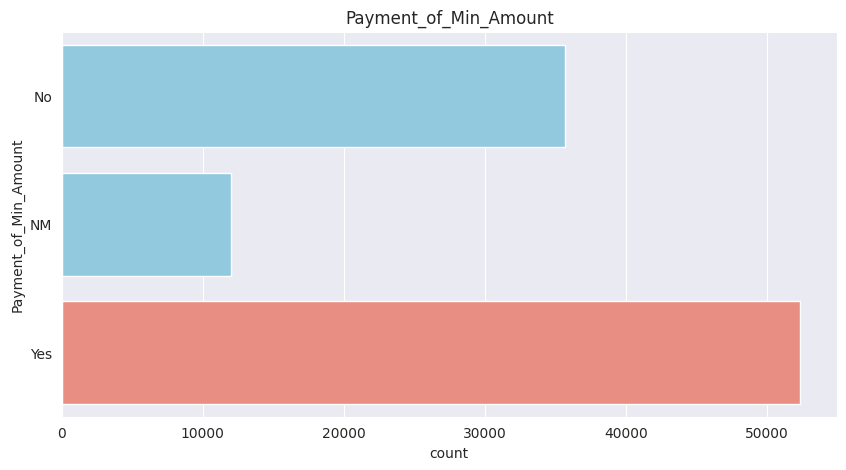

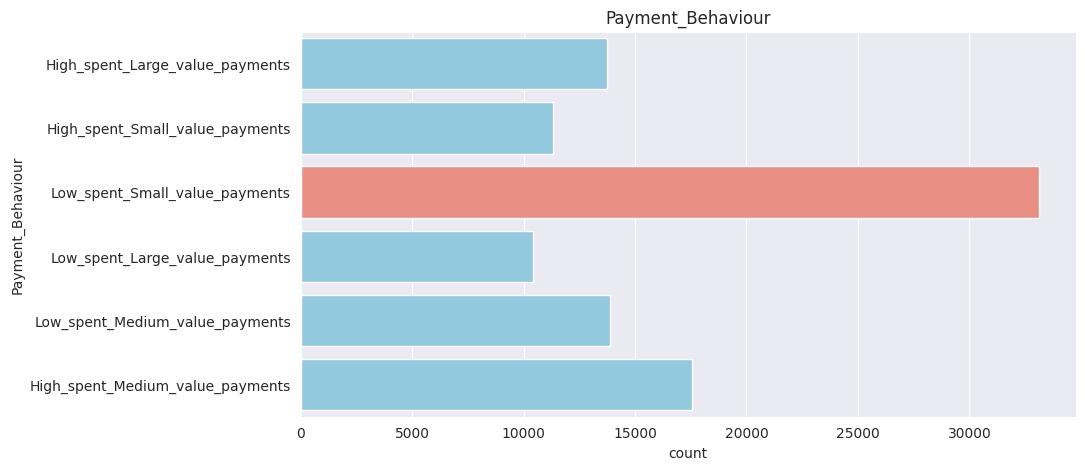

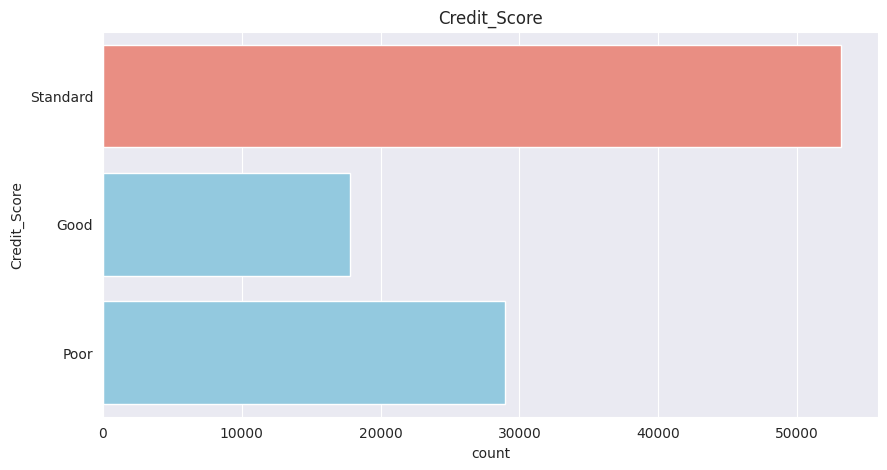

In [ ]:
for col in categorical_variables.columns:
    # Count the occurrences of each category
    plt.figure(figsize=(10,5))
    category_counts = categorical_variables[col].value_counts()
    category_counts = category_counts.sample(len(category_counts))

    temp_category_counts = category_counts.copy()
    temp_category_counts.index = range(len(temp_category_counts))

    # Find the category with the highest count
    max_index = temp_category_counts.idxmax()

    # Create a custom color palette with the highest count category in a different color
    custom_palette = ['skyblue']*(len(category_counts) - 1)
    custom_palette.insert(max_index, "salmon")

    sns.barplot(x=category_counts, y=category_counts.index,
                hue = category_counts.index, palette=custom_palette, orient="h")
    plt.title(col)
    plt.show()

In [ ]:
creditScore_data = pd.concat([numerical_variables, categorical_variables], axis=1)

In [ ]:
creditScore_data.head()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            3093.745000                  3                4              3   
2            3093.745000                  3                4              3   
3            3093.745000                  3                4              3   
4            1824.843333                  3                4              3   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0                    3                   4.0                 26.822620   
1                   18                   4.0                 31.944960   
2                    3                   4.0                 28.609352   
3                    5                   4.0                 31.377862   
4                    6                   4.0                 24.797347   

   Total_EMI_per_month  Annual_Income  Num_of_Loan  Num_of_Delayed_Payment  \
0            49.574949       19114.12          4.0                     7.0   
1            49.574949       19114.12          4.0                    14.0   
2            49.574949       19114.12          4.0                     7.0   
3            49.574949       19114.12          4.0                     4.0   
4            49.574949       19114.12          4.0                    14.0   

   Changed_Credit_Limit  Outstanding_Debt  Amount_invested_monthly  \
0                 11.27            809.98                80.415295   
1                 11.27            809.98               118.280222   
2                  9.40            809.98                81.699521   
3                  6.27            809.98               199.458074   
4                 11.27            809.98                41.420153   

   Monthly_Balance  yearly_delay_charge  Credit_History_Age  \
0       312.494089            53.937336               265.0   
1       284.629162           589.533279               219.0   
2       331.209863            57.167730               267.0   
3       223.451310            36.731722               268.0   
4       341.489231           235.767907               269.0   

  Payment_of_Min_Amount                 Payment_Behaviour Credit_Score  
0                    No   High_spent_Small_value_payments         Good  
1                    No    Low_spent_Large_value_payments         Good  
2                    No   Low_spent_Medium_value_payments         Good  
3                    No    Low_spent_Small_value_payments         Good  
4                    No  High_spent_Medium_value_payments         Good

The good, standard, and poor credit score don't have a significant difference in monthly Inhand Salary

Text(0.5, 1.0, 'Monthly Inhand Salary vs Credit Score')

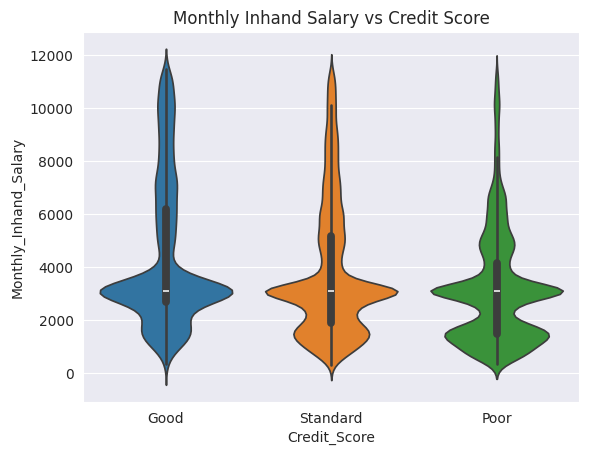

In [ ]:
sns.violinplot(data = creditScore_data, x = "Credit_Score",
               y = "Monthly_Inhand_Salary",
               hue = "Credit_Score").set_title("Monthly Inhand Salary vs Credit Score")

Text(0.5, 1.0, 'Credit Utilization Ratio vs Credit Score')

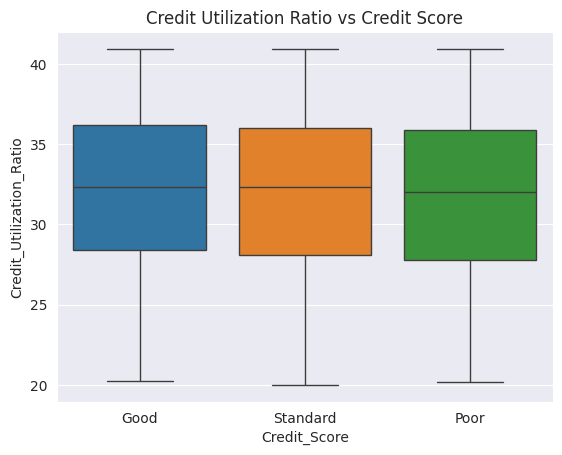

In [ ]:
sns.boxplot(data = creditScore_data, x = "Credit_Score",
               y = "Credit_Utilization_Ratio",
               hue = "Credit_Score").set_title("Credit Utilization Ratio vs Credit Score")

This is interesting because the Poor value has no outliers in delay from due date. The Good and Standard values have a tons of outliers in delay from due date.

Text(0.5, 1.0, 'Delay_from_due_date vs Credit Score')

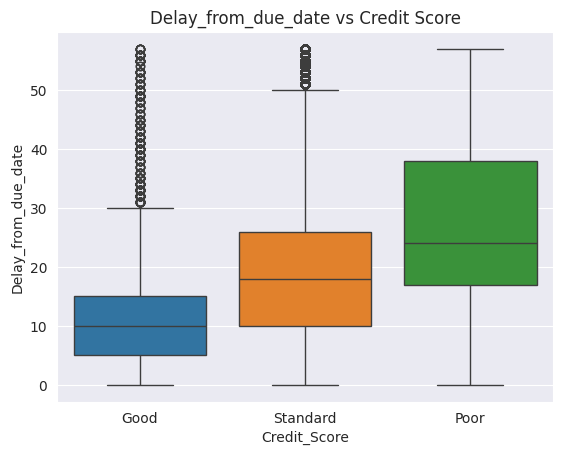

In [ ]:
sns.boxplot(data = creditScore_data, x = "Credit_Score",
               y = "Delay_from_due_date",
               hue = "Credit_Score").set_title("Delay_from_due_date vs Credit Score")

Text(0.5, 1.0, 'Num_of_Delayed_Payment vs Credit Score')

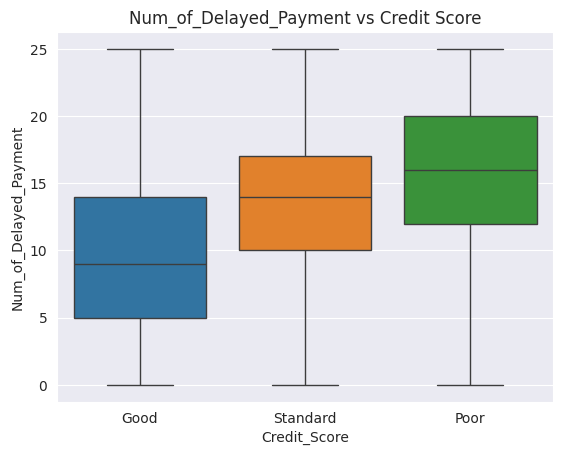

In [ ]:
sns.boxplot(data = creditScore_data, x = "Credit_Score",
               y = "Num_of_Delayed_Payment",
               hue = "Credit_Score").set_title("Num_of_Delayed_Payment vs Credit Score")

Text(0.5, 1.0, 'Outstanding_Debt vs Credit Score')

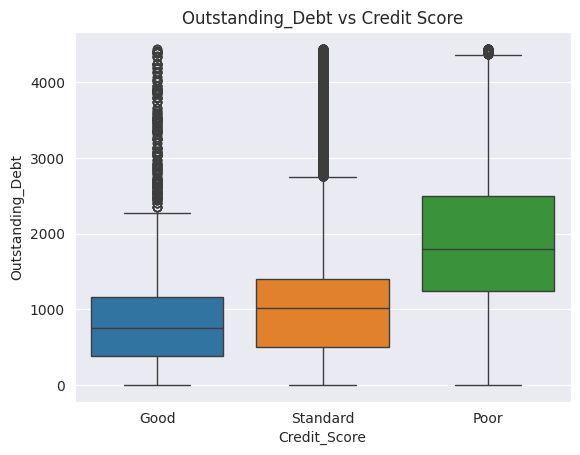

In [ ]:
sns.boxplot(data = creditScore_data, x = "Credit_Score",
               y = "Outstanding_Debt",
               hue = "Credit_Score").set_title("Outstanding_Debt vs Credit Score")

Find the relationship between each of the numerical variables and categorize them by the
response variable.

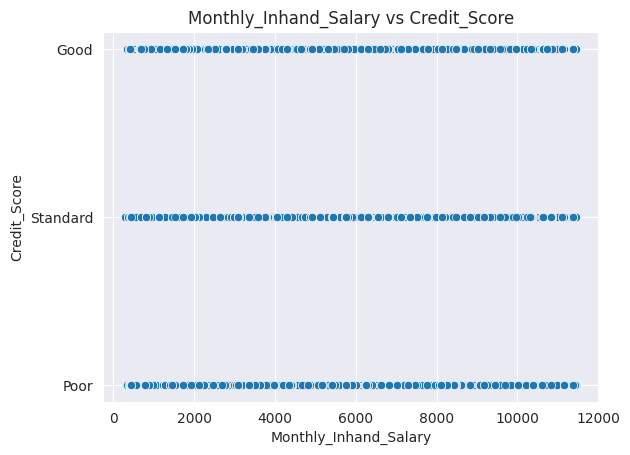

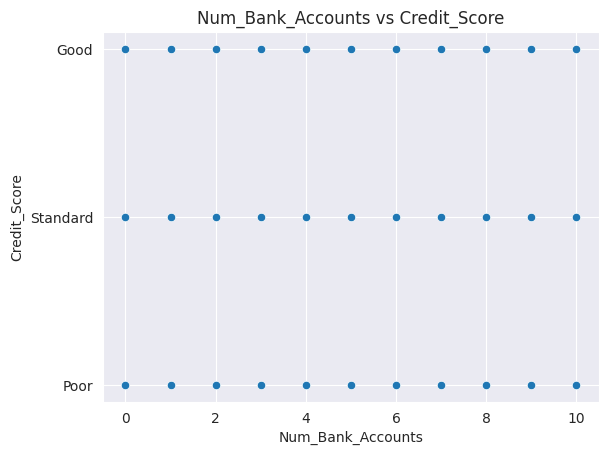

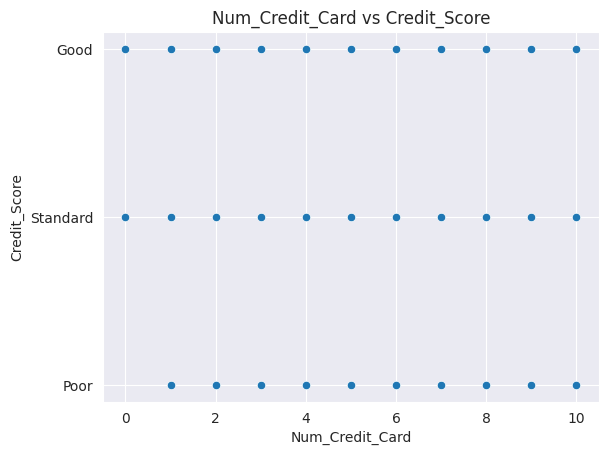

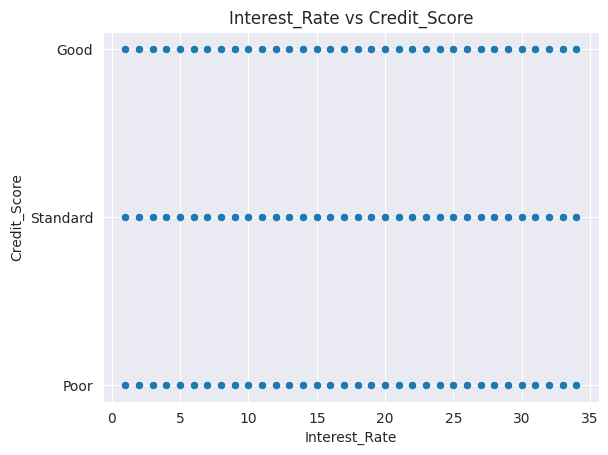

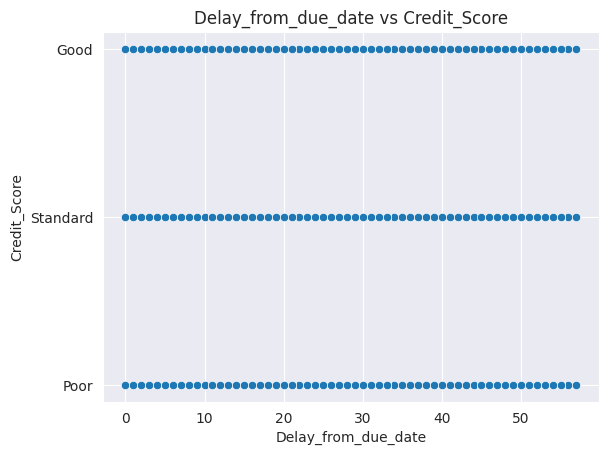

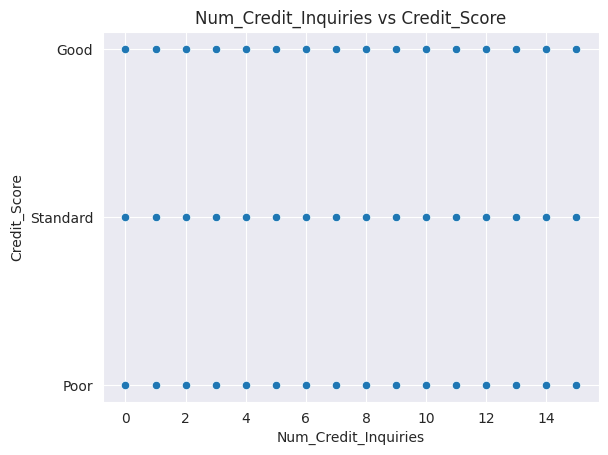

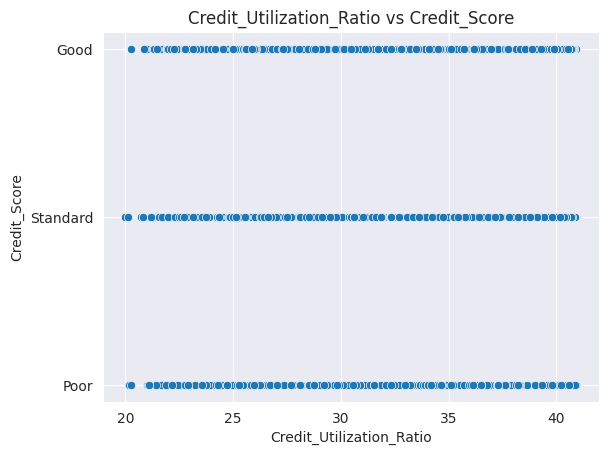

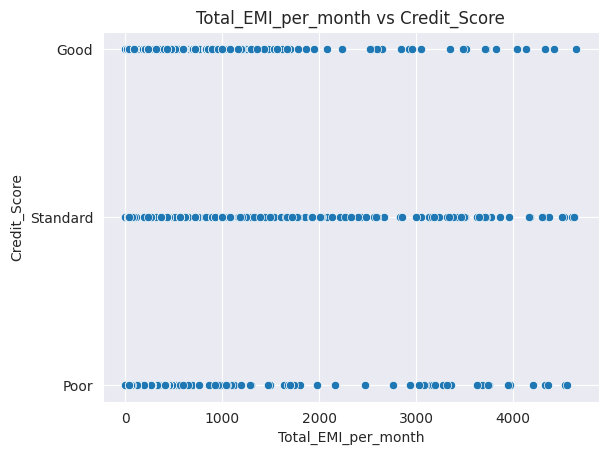

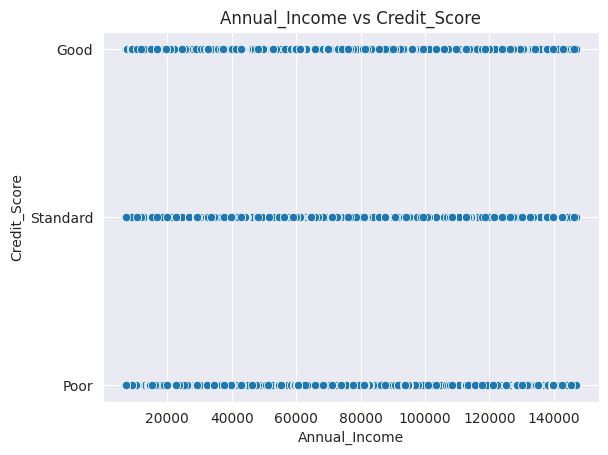

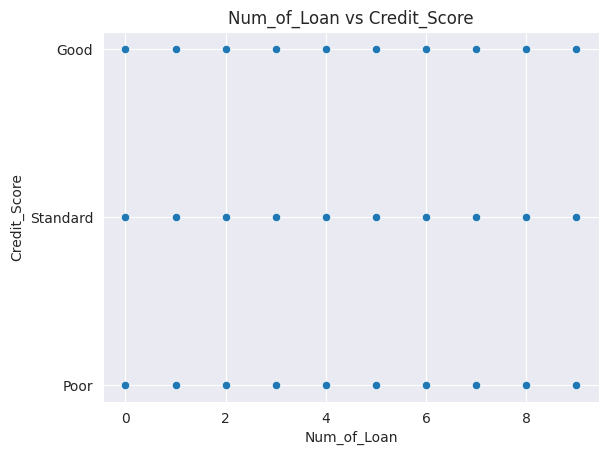

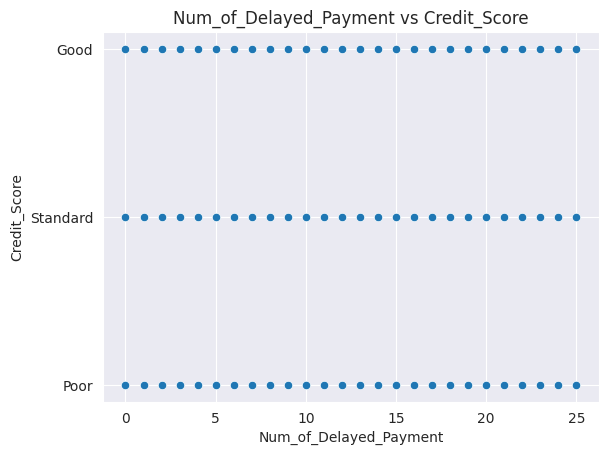

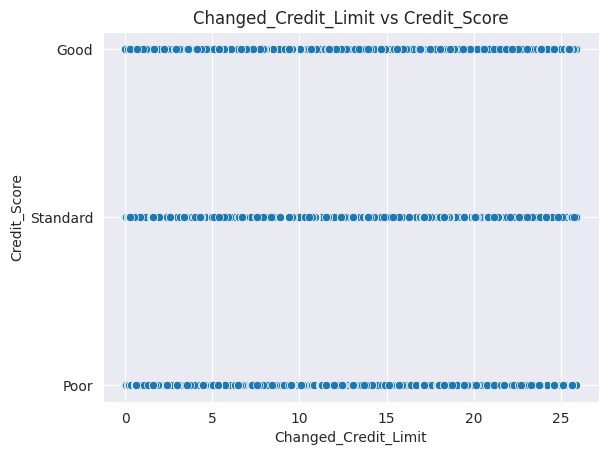

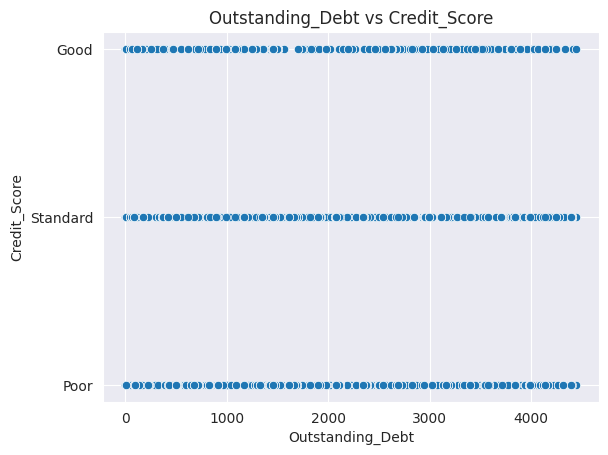

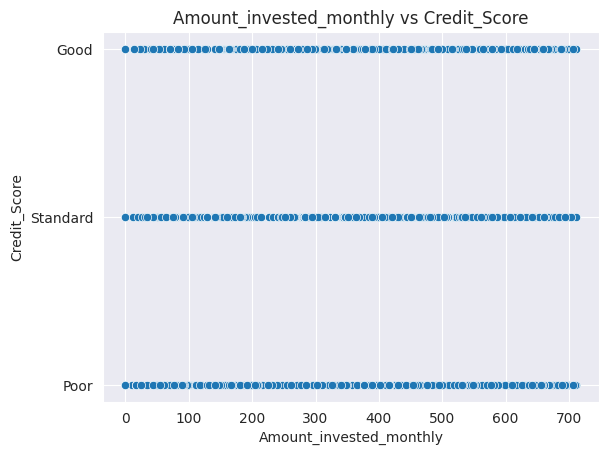

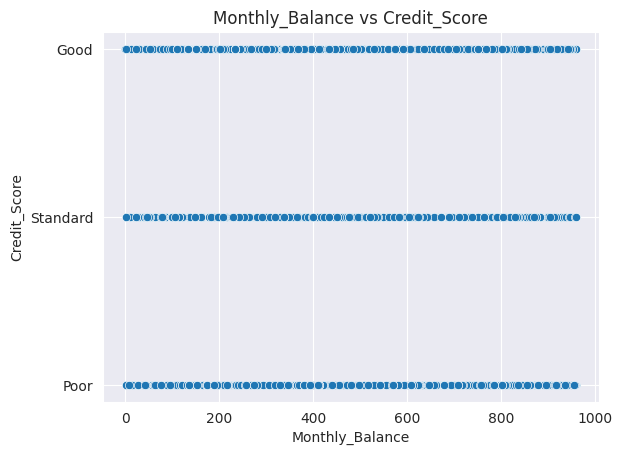

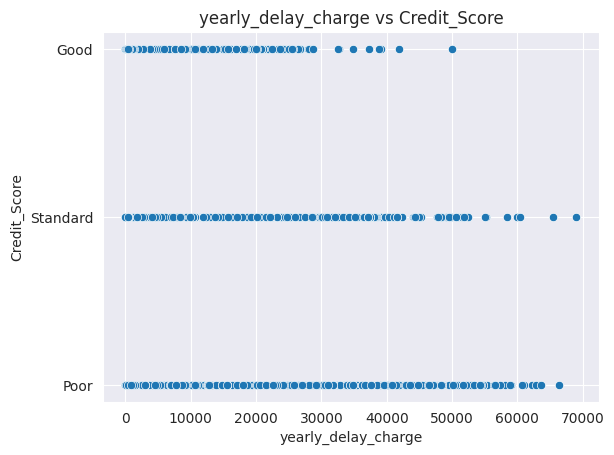

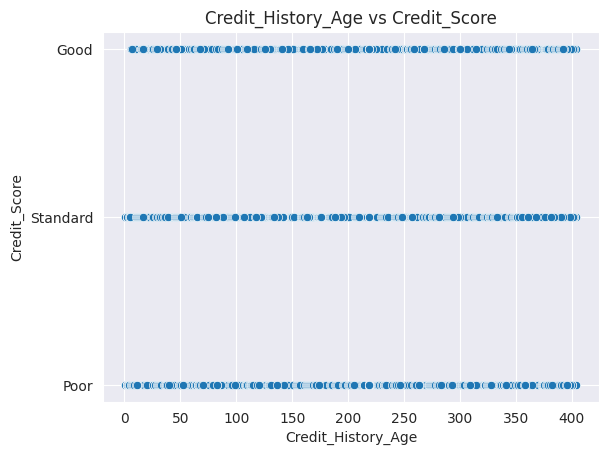

In [ ]:
response_variable = "Credit_Score"

for var in numerical_variables:
  sns.scatterplot(x=var, y=response_variable, data = creditScore_data)
  plt.title(f'{var} vs {response_variable}')
  plt.show()




```
# This is formatted as code
```

Encode the categorical variables by ordinal numbers to find the relationship between each of the categorical variables and categorizes them by the response variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

for var in categorical_variables:
  label_encoder = LabelEncoder()
  creditScore_data[var] = label_encoder.fit_transform(creditScore_data[var])


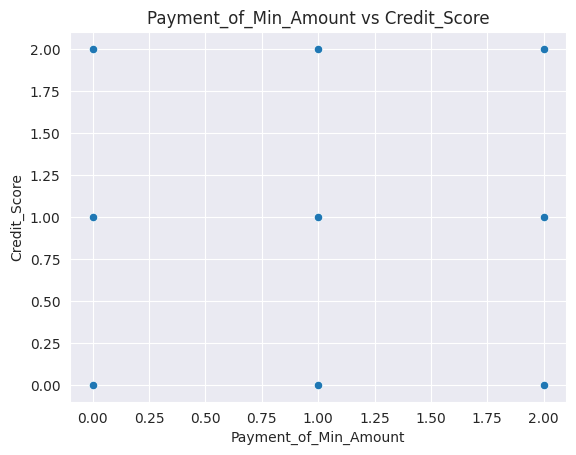

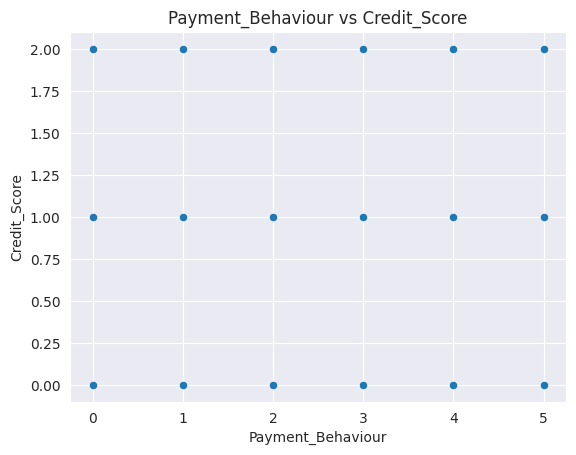

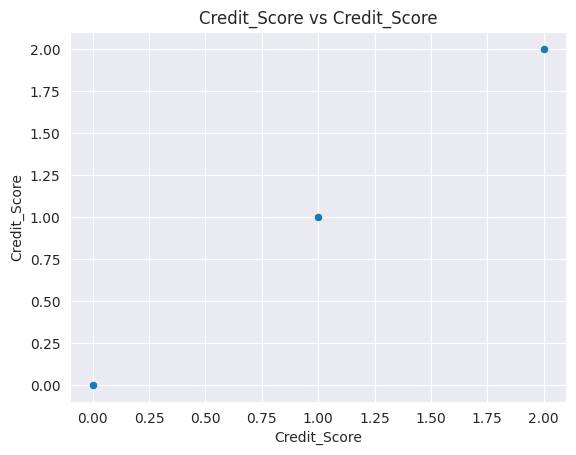

In [ ]:
for var in categorical_variables:
    sns.scatterplot(x=var, y=response_variable, data=creditScore_data)
    plt.title(f'{var} vs {response_variable}')
    plt.show()

Check correlation between variables using correlation matrix --> seems like annual_income and monthly_inhand_salary are multicollinear

In [ ]:
# heat map

cor = numerical_variables.corr()
cor.style.background_gradient(cmap='coolwarm')

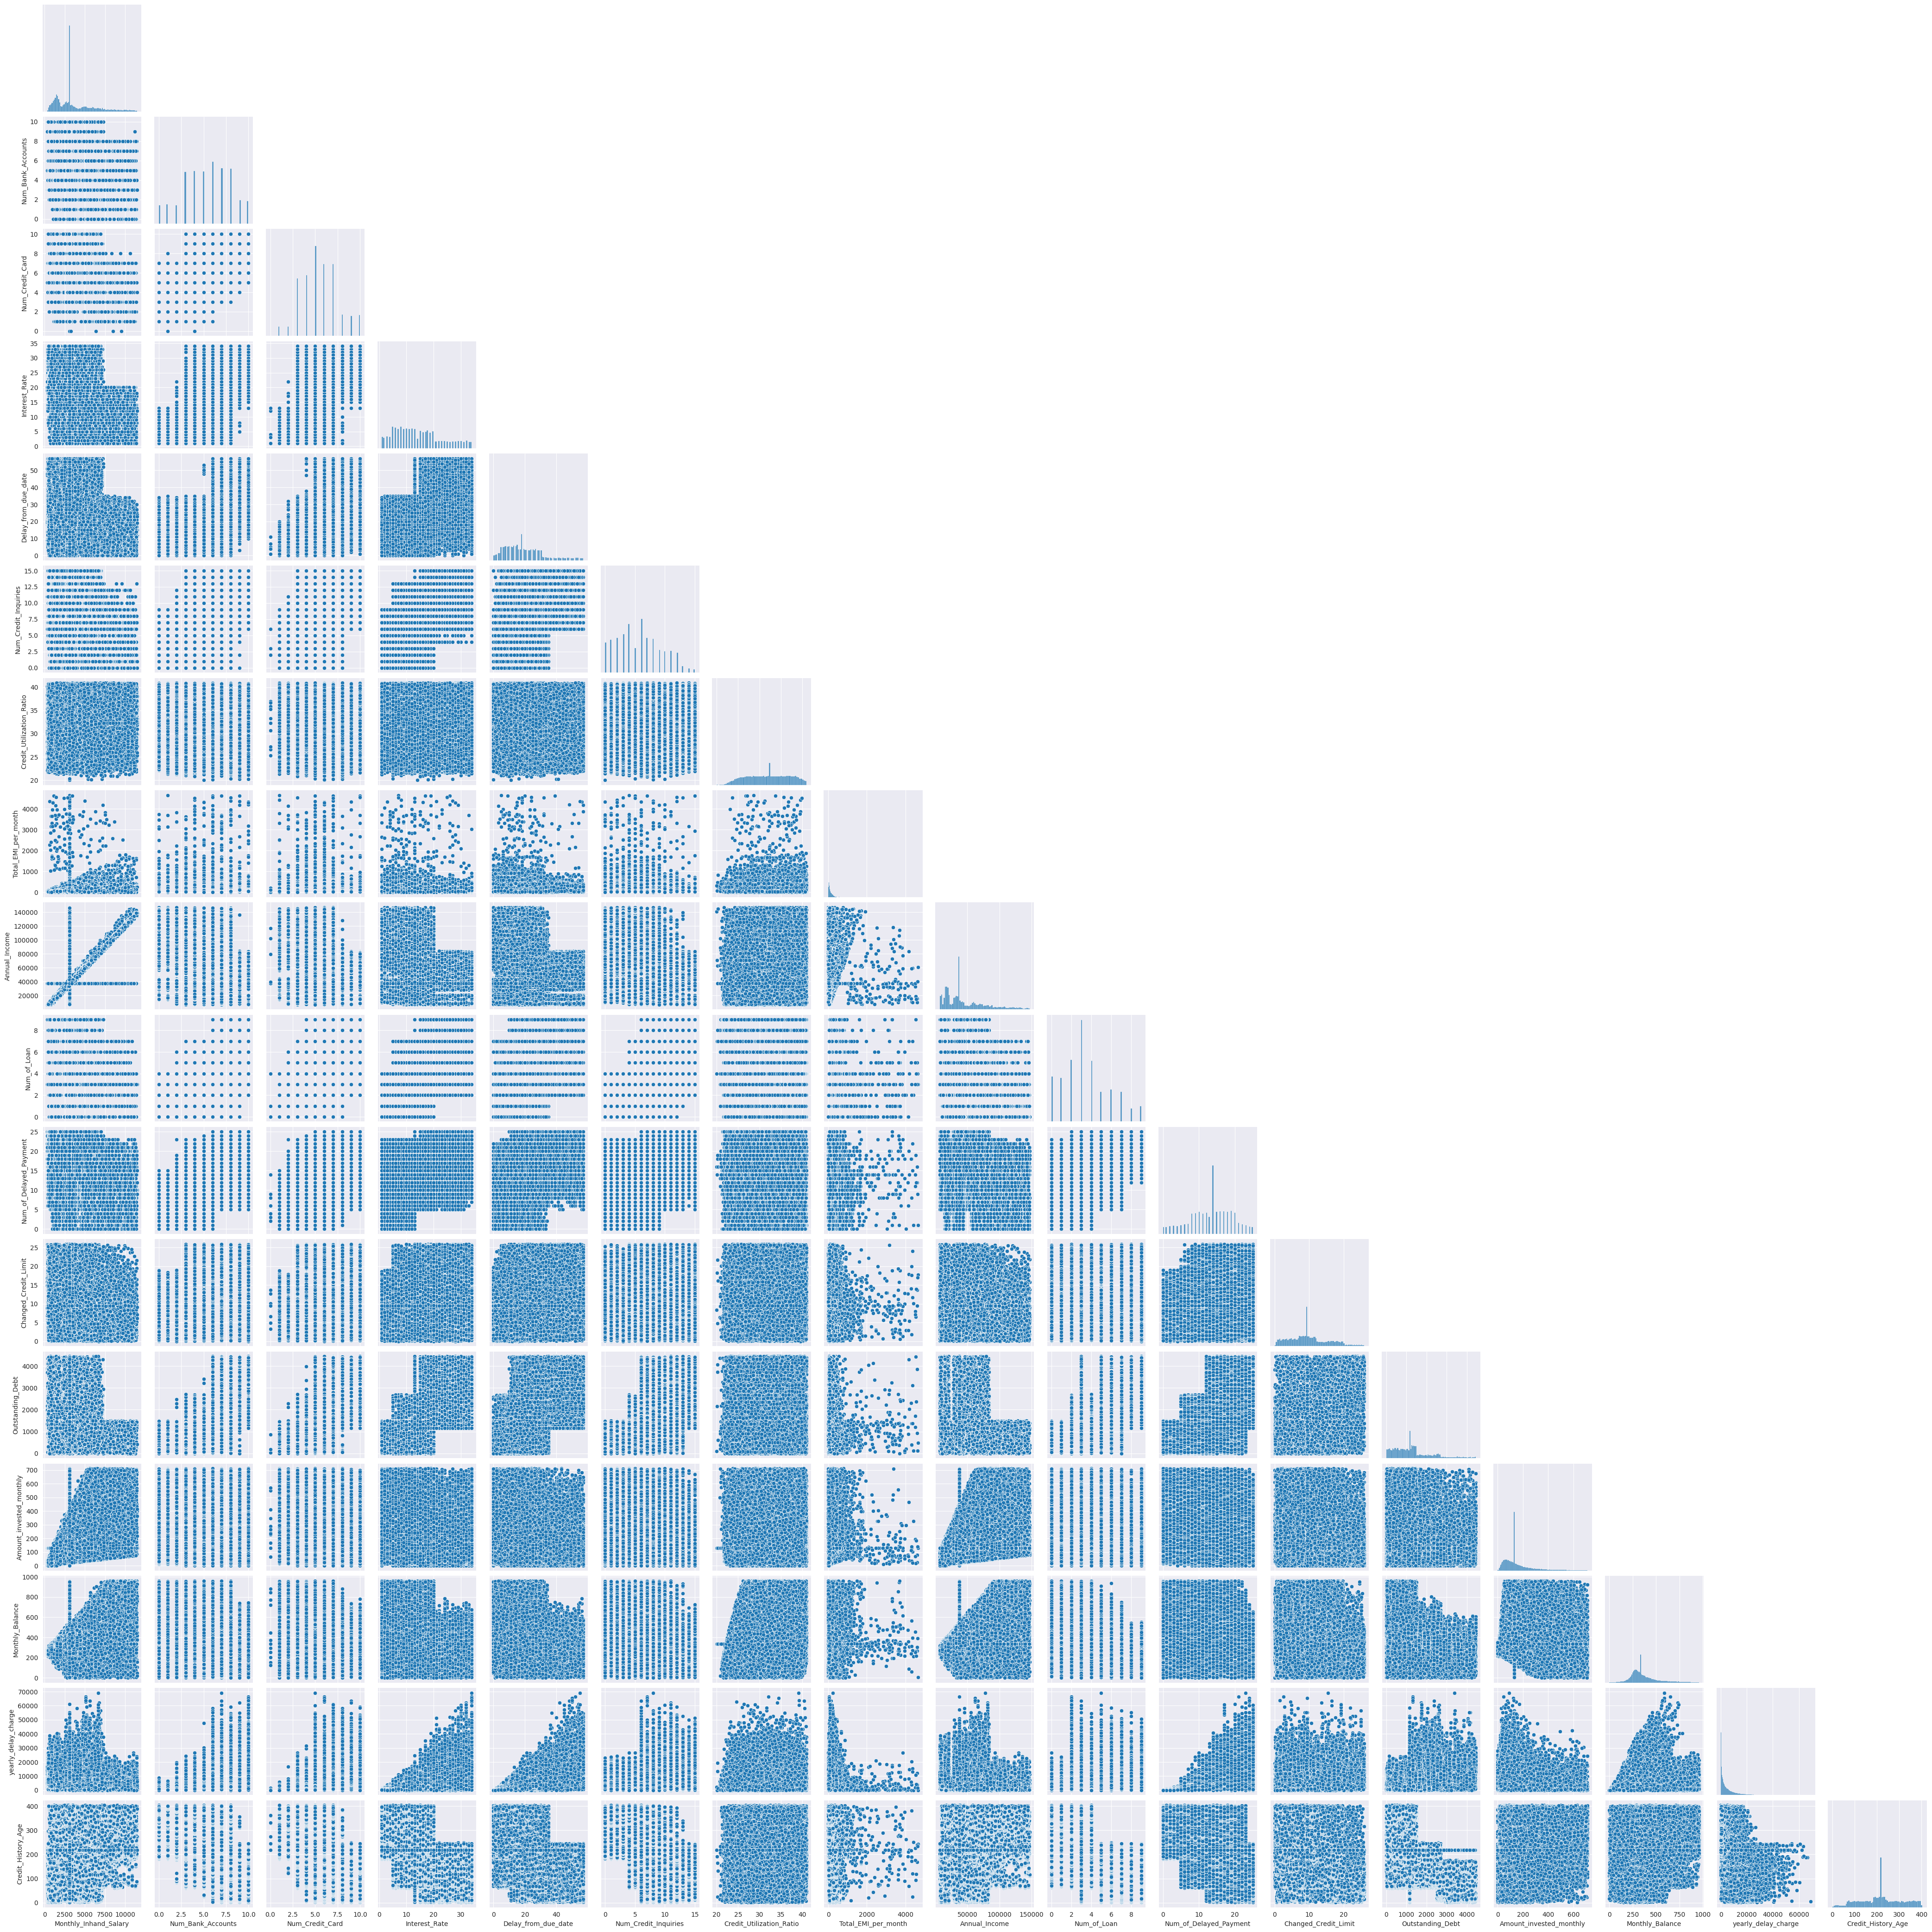

In [ ]:
# pair plot
sns.pairplot(numerical_variables, corner=True)
plt.show()

## Statistical Modeling

In [ ]:
creditScore_data

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                  3                4   
1                3093.745000                  3                4   
2                3093.745000                  3                4   
3                3093.745000                  3                4   
4                1824.843333                  3                4   
...                      ...                ...              ...   
99995            3359.415833                  4                6   
99996            3359.415833                  4                6   
99997            3359.415833                  4                6   
99998            3359.415833                  4                6   
99999            3359.415833                  4                6   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
0                  3                    3                   4.0   
1                  3                   18                   4.0   
2                  3                    3                   4.0   
3                  3                    5                   4.0   
4                  3                    6                   4.0   
...              ...                  ...                   ...   
99995              7                   23                   3.0   
99996              7                   18                   3.0   
99997             13                   27                   3.0   
99998              7                   20                   3.0   
99999              7                   18                   3.0   

       Credit_Utilization_Ratio  Total_EMI_per_month  Annual_Income  \
0                     26.822620            49.574949       19114.12   
1                     31.944960            49.574949       19114.12   
2                     28.609352            49.574949       19114.12   
3                     31.377862            49.574949       19114.12   
4                     24.797347            49.574949       19114.12   
...                         ...                  ...            ...   
99995                 34.663572            35.104023       39628.99   
99996                 40.565631            35.104023       39628.99   
99997                 32.305784            35.104023       39628.99   
99998                 33.638208            35.104023       39628.99   
99999                 34.192463            35.104023       37550.74   

       Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0              4.0                     7.0                 11.27   
1              4.0                    14.0                 11.27   
2              4.0                     7.0                  9.40   
3              4.0                     4.0                  6.27   
4              4.0                    14.0                 11.27   
...            ...                     ...                   ...   
99995          2.0                     7.0                 11.50   
99996          2.0                     7.0                 11.50   
99997          2.0                     6.0                 11.50   
99998          2.0                    14.0                 11.50   
99999          2.0                     6.0                 11.50   

       Outstanding_Debt  Amount_invested_monthly  Monthly_Balance  \
0                809.98                80.415295       312.494089   
1                809.98               118.280222       284.629162   
2                809.98                81.699521       331.209863   
3                809.98               199.458074       223.451310   
4                809.98                41.420153       341.489231   
...                 ...                      ...              ...   
99995            502.38                60.971333       479.866228   
99996            502.38                54.185950       496.651610   
99997            502.38                24.028477       516.809083   
99998            502.38  

In [ ]:
creditScore_d = pd.concat([numerical_variables, final_df], axis=1)

In [ ]:
creditScore_d.head()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            3093.745000                  3                4              3   
2            3093.745000                  3                4              3   
3            3093.745000                  3                4              3   
4            1824.843333                  3                4              3   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0                    3                   4.0                 26.822620   
1                   18                   4.0                 31.944960   
2                    3                   4.0                 28.609352   
3                    5                   4.0                 31.377862   
4                    6                   4.0                 24.797347   

   Total_EMI_per_month  Annual_Income  Num_of_Loan  ...  \
0            49.574949       19114.12          4.0  ...   
1            49.574949       19114.12          4.0  ...   
2            49.574949       19114.12          4.0  ...   
3            49.574949       19114.12          4.0  ...   
4            49.574949       19114.12          4.0  ...   

   Payment_of_Min_Amount_Yes  \
0                        0.0   
1                        0.0   
2                        0.0   
3                        0.0   
4                        0.0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                1.0    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                1.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                               0.0   
1                                               1.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                0.0   
1                                                0.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_Low_spent_Small_value_payments  Credit_Score_Good  \
0                                               0.0                1.0   
1                                               0.0                1.0   
2                                               0.0                1.0   
3                                               1.0                1.0   
4                                               0.0                1.0   

   Credit_Score_Poor  Credit_Score_Standard  
0                0.0                    0.0  
1                0.0                    0.0  
2                0.0                    0.0  
3                0.0                    0.0  
4                0.0                    0.0  

[5 rows x 29 columns]

Feature selection


In [ ]:
# from skfeature.function.similarity_based import fisher_score
# ranks = fisher_score.fisher_score(creditScore_d, categorical_columns)

Multicollinearity check

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = creditScore_d.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(creditScore_d.values, i)
                          for i in range(len(creditScore_d.columns))]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                              feature       VIF
0                               Monthly_Inhand_Salary  3.281386
1                                   Num_Bank_Accounts  1.968362
2                                     Num_Credit_Card  1.525987
3                                       Interest_Rate  3.280799
4                                 Delay_from_due_date  3.145884
5                                Num_Credit_Inquiries  2.170611
6                            Credit_Utilization_Ratio  1.018399
7                                 Total_EMI_per_month  1.237299
8                                       Annual_Income  3.656805
9                                         Num_of_Loan  2.044213
10                             Num_of_Delayed_Payment  1.950932
11                               Changed_Credit_Limit  1.318613
12                                   Outstanding_Debt  2.048326
13                            Amount_invested_monthly  1.678656
14                                    Mo

In [ ]:
### getting headers
my_list = creditScore_d.columns.to_list()
headers = " + ".join(str(element) for element in my_list)
headers

'Monthly_Inhand_Salary + Num_Bank_Accounts + Num_Credit_Card + Interest_Rate + Delay_from_due_date + Num_Credit_Inquiries + Credit_Utilization_Ratio + Total_EMI_per_month + Annual_Income + Num_of_Loan + Num_of_Delayed_Payment + Changed_Credit_Limit + Outstanding_Debt + Amount_invested_monthly + Monthly_Balance + yearly_delay_charge + Credit_History_Age + Payment_of_Min_Amount_NM + Payment_of_Min_Amount_No + Payment_of_Min_Amount_Yes + Payment_Behaviour_High_spent_Large_value_payments + Payment_Behaviour_High_spent_Medium_value_payments + Payment_Behaviour_High_spent_Small_value_payments + Payment_Behaviour_Low_spent_Large_value_payments + Payment_Behaviour_Low_spent_Medium_value_payments + Payment_Behaviour_Low_spent_Small_value_payments + Credit_Score_Good + Credit_Score_Poor + Credit_Score_Standard'

In [ ]:
o_y,o_X = patsy.dmatrices('Credit_Score_Good ~ Monthly_Inhand_Salary + Num_Bank_Accounts + Num_Credit_Card + Interest_Rate + Delay_from_due_date + Num_Credit_Inquiries + Credit_Utilization_Ratio + Total_EMI_per_month +  Num_of_Loan + Num_of_Delayed_Payment + Changed_Credit_Limit + Outstanding_Debt + Amount_invested_monthly + Monthly_Balance + Credit_History_Age + Payment_of_Min_Amount_NM + Payment_of_Min_Amount_No + Payment_of_Min_Amount_Yes + Payment_Behaviour_High_spent_Large_value_payments + Payment_Behaviour_High_spent_Medium_value_payments + Payment_Behaviour_High_spent_Small_value_payments + Payment_Behaviour_Low_spent_Large_value_payments + Payment_Behaviour_Low_spent_Medium_value_payments + Payment_Behaviour_Low_spent_Small_value_payments', data = creditScore_d, return_type = 'dataframe')
y2,X2 = patsy.dmatrices('Credit_Score_Standard ~ Monthly_Inhand_Salary + Num_Bank_Accounts + Num_Credit_Card + Interest_Rate + Delay_from_due_date + Num_Credit_Inquiries + Credit_Utilization_Ratio + Total_EMI_per_month +  Num_of_Loan + Changed_Credit_Limit + Outstanding_Debt + Amount_invested_monthly + Monthly_Balance + Credit_History_Age + Payment_of_Min_Amount_No + Payment_of_Min_Amount_Yes + Payment_Behaviour_High_spent_Large_value_payments + Payment_Behaviour_High_spent_Medium_value_payments + Payment_Behaviour_High_spent_Small_value_payments + Payment_Behaviour_Low_spent_Large_value_payments + Payment_Behaviour_Low_spent_Medium_value_payments', data = creditScore_d, return_type = 'dataframe')
o_y3, o_X3 = patsy.dmatrices('Credit_Score_Poor ~ Monthly_Inhand_Salary + Num_Bank_Accounts + Num_Credit_Card + Interest_Rate + Delay_from_due_date + Num_Credit_Inquiries + Credit_Utilization_Ratio + Total_EMI_per_month + Num_of_Loan + Num_of_Delayed_Payment + Changed_Credit_Limit + Outstanding_Debt + Amount_invested_monthly + Monthly_Balance + Credit_History_Age + Payment_of_Min_Amount_NM + Payment_of_Min_Amount_No + Payment_of_Min_Amount_Yes + Payment_Behaviour_High_spent_Large_value_payments + Payment_Behaviour_High_spent_Medium_value_payments + Payment_Behaviour_High_spent_Small_value_payments + Payment_Behaviour_Low_spent_Large_value_payments + Payment_Behaviour_Low_spent_Medium_value_payments + Payment_Behaviour_Low_spent_Small_value_payments', data = creditScore_d, return_type = 'dataframe')


In [ ]:
mod = sm.Logit(o_y,o_X)
mod2 = sm.Logit(y2,X2)
mod3 = sm.Logit(o_y3,o_X3)

# Fit the data to each model
res = mod.fit()
res2 = mod2.fit()
res3 = mod3.fit()

Optimization terminated successfully.
         Current function value: 0.335508
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.643705
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.477639
         Iterations 6


Muticollinearity Example in Credit_Score_Good model

In [ ]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:      Credit_Score_Good   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99977
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.2843
Time:                        22:44:14   Log-Likelihood:                -33551.
converged:                       True   LL-Null:                       -46878.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.9245        nan        nan        nan         nan         nan
Monthly_Inh

Correct model in Credit_Score_Good

In [ ]:
y,X = patsy.dmatrices('Credit_Score_Good ~ Monthly_Inhand_Salary + Num_Bank_Accounts + Num_Credit_Card + Interest_Rate + Delay_from_due_date + Num_Credit_Inquiries + Credit_Utilization_Ratio + Total_EMI_per_month +  Num_of_Loan + Num_of_Delayed_Payment + Changed_Credit_Limit + Outstanding_Debt + Amount_invested_monthly + Monthly_Balance + Credit_History_Age + Payment_of_Min_Amount_No + Payment_of_Min_Amount_Yes + Payment_Behaviour_High_spent_Large_value_payments + Payment_Behaviour_High_spent_Medium_value_payments + Payment_Behaviour_High_spent_Small_value_payments + Payment_Behaviour_Low_spent_Large_value_payments + Payment_Behaviour_Low_spent_Medium_value_payments', data = creditScore_d, return_type = 'dataframe')
mod = sm.Logit(y,X)
mod.fit().summary()

Optimization terminated successfully.
         Current function value: 0.335508
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Credit_Score_Good   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99977
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.2843
Time:                        22:44:15   Log-Likelihood:                -33551.
converged:                       True   LL-Null:                       -46878.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              1.4399      0.099     14.555      0.000       1.246       1.634
Monthly_Inhand_Salary                               5.854e-06   4.47e-06      1.310      0.190    -2.9e-06    1.46e-05
Num_Bank_Accounts                                     -0.0491      0.005     -9.886      0.000      -0.059      -0.039
Num_Credit_Card                                       -0.2366      0.006    -39.195      0.000      -0.248      -0.225
Interest_Rate                                         -0.0635      0.002    -30.050      0.000      -0.068      -0.059
Delay_from_due_date                                   -0.0363      0.001    -27.765      0.000      -0.039      -0.034
Num_Credit_Inquiries                                   0.0019      0.004      0.449      0.654      -0.006       0.010
Credit_Utilization_Ratio                              -0.0036      0.002     -1.767      0.077      -0.008       0.000
Total_EMI_per_month                                    0.0011   5.51e-05     19.153      0.000       0.001       0.001
Num_of_Loan                                           -0.0338      0.007     -5.021      0.000      -0.047      -0.021
Num_of_Delayed_Payment                                -0.0155      0.002     -7.444      0.000      -0.020      -0.011
Changed_Credit_Limit                                  -0.0087      0.002     -3.608      0.000      -0.013      -0.004
Outstanding_Debt                                   -4.725e-05   1.88e-05     -2.513      0.012   -8.41e-05   -1.04e-05
Amount_invested_monthly                            -6.194e-05   8.01e-05     -0.773      0.439      -0.000     9.5e-05
Monthly_Balance                                       -0.0006   6.64e-05     -9.599      0.000      -0.001      -0.001
Credit_History_Age                                     0.0012      0.000      8.239      0.000       0.001       0.001
Payment_of_Min_Amount_No                               0.2699      0.029      9.154      0.000       0.212       0.328
Payment_of_Min_Amount_Yes                             -1.0592      0.038    -27.943      0.000      -1.134      -0.985
Payment_Behaviour_High_spent_Large_value_payments      0.3576      0.034     10.386      0.000       0.290       0.425
Payment_Behaviour_High_spent_Medium_value_payments     0.3292      0.031     10.566      0.000       0.268       0.390
Payment_Behaviour_High_spent_Small_value_payments      0.2685      0.034      7.854      0.000       0.202       0.336
Payment_Behaviour_Low_spent_Large_value_payments       0.1868      0.035      5.334      0.000       0.118       0.255
Payment_Behaviour_Low_spent_Medium_value_payments      0.1171      0.032      3.664      0.000       0.054       0.180
======================================================================================================================
"""

In [ ]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Credit_Score_Standard   No. Observations:               100000
Model:                             Logit   Df Residuals:                    99978
Method:                              MLE   Df Model:                           21
Date:                   Mon, 27 May 2024   Pseudo R-squ.:                 0.06862
Time:                           22:44:16   Log-Likelihood:                -64371.
converged:                          True   LL-Null:                       -69113.
Covariance Type:               nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.4534      0.068      6.685      0.000       0.320       0.586
Monthly_Inhand_Salary                               1.205e-05   3.71e-06      3.250      0.001    4.78e-06    1.93e-05
Num_Bank_Accounts                                      0.0762      0.004     21.739      0.000       0.069       0.083
Num_Credit_Card                                        0.0012      0.004      0.306      0.760      -0.007       0.009
Interest_Rate                                         -0.0210      0.001    -17.794      0.000      -0.023      -0.019
Delay_from_due_date                                   -0.0052      0.001     -7.847      0.000      -0.007      -0.004
Num_Credit_Inquiries                                  -0.0940      0.003    -35.093      0.000      -0.099      -0.089
Credit_Utilization_Ratio                              -0.0005      0.001     -0.343      0.732      -0.003       0.002
Total_EMI_per_month                                   -0.0004   4.54e-05     -8.341      0.000      -0.000      -0.000
Num_of_Loan                                           -0.0255      0.004     -6.276      0.000      -0.033      -0.018
Changed_Credit_Limit                                   0.0515      0.001     38.476      0.000       0.049       0.054
Outstanding_Debt                                      -0.0003   9.62e-06    -33.621      0.000      -0.000      -0.000
Amount_invested_monthly                                0.0001   6.19e-05      1.900      0.057   -3.74e-06       0.000
Monthly_Balance                                     1.115e-05   5.37e-05      0.208      0.836   -9.41e-05       0.000
Credit_History_Age                                     0.0005   9.81e-05      4.631      0.000       0.000       0.001
Payment_of_Min_Amount_No                              -0.5459      0.024    -22.868      0.000      -0.593      -0.499
Payment_of_Min_Amount_Yes                              0.5006      0.023     22.121      0.000       0.456       0.545
Payment_Behaviour_High_spent_Large_value_payments      0.1055      0.025      4.239      0.000       0.057       0.154
Payment_Behaviour_High_spent_Medium_value_payments     0.0890      0.021      4.143      0.000       0.047       0.131
Payment_Behaviour_High_spent_Small_value_payments      0.0849      0.023      3.645      0.000       0.039       0.130
Payment_Behaviour_Low_spent_Large_value_payments       0.0511      0.024      2.154      0.031       0.005       0.098
Payment_Behaviour_Low_spent_Medium_value_payments     -0.0237      0.021     -1.107      0.268      -0.066       0.018
======================================================================================================================
"""

Multicollinearity Example in Credit_Score_Poor

In [ ]:
print(res3.summary())

                           Logit Regression Results                           
Dep. Variable:      Credit_Score_Poor   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99977
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.2068
Time:                        22:44:16   Log-Likelihood:                -47764.
converged:                       True   LL-Null:                       -60213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.9633   3.88e+05  -5.06e-06      1.000   -7.61e+05    7.61e+05
Monthly_Inh

Correct model in Credit_Score_Poor

In [ ]:
y3, X3 = patsy.dmatrices('Credit_Score_Poor ~ Monthly_Inhand_Salary + Num_Bank_Accounts + Num_Credit_Card + Interest_Rate + Delay_from_due_date + Num_Credit_Inquiries + Credit_Utilization_Ratio + Total_EMI_per_month + Num_of_Loan + Num_of_Delayed_Payment + Changed_Credit_Limit + Outstanding_Debt + Amount_invested_monthly + Monthly_Balance + Credit_History_Age + Payment_of_Min_Amount_No + Payment_of_Min_Amount_Yes + Payment_Behaviour_High_spent_Large_value_payments + Payment_Behaviour_High_spent_Medium_value_payments + Payment_Behaviour_High_spent_Small_value_payments + Payment_Behaviour_Low_spent_Large_value_payments + Payment_Behaviour_Low_spent_Medium_value_payments', data = creditScore_d, return_type = 'dataframe')
sm.Logit(y3,X3).fit().summary()

Optimization terminated successfully.
         Current function value: 0.477639
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Credit_Score_Poor   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99977
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.2068
Time:                        22:44:17   Log-Likelihood:                -47764.
converged:                       True   LL-Null:                       -60213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -2.7282      0.085    -32.127      0.000      -2.895      -2.562
Monthly_Inhand_Salary                              -1.379e-05   5.04e-06     -2.738      0.006   -2.37e-05   -3.92e-06
Num_Bank_Accounts                                     -0.0163      0.004     -3.667      0.000      -0.025      -0.008
Num_Credit_Card                                        0.1360      0.005     28.503      0.000       0.127       0.145
Interest_Rate                                          0.0516      0.001     37.700      0.000       0.049       0.054
Delay_from_due_date                                    0.0180      0.001     23.958      0.000       0.017       0.019
Num_Credit_Inquiries                                   0.1039      0.003     32.996      0.000       0.098       0.110
Credit_Utilization_Ratio                               0.0017      0.002      0.991      0.322      -0.002       0.005
Total_EMI_per_month                                   -0.0005   6.41e-05     -7.041      0.000      -0.001      -0.000
Num_of_Loan                                            0.0288      0.005      6.016      0.000       0.019       0.038
Num_of_Delayed_Payment                                -0.0269      0.002    -14.329      0.000      -0.031      -0.023
Changed_Credit_Limit                                  -0.0537      0.002    -35.303      0.000      -0.057      -0.051
Outstanding_Debt                                       0.0003   1.08e-05     23.176      0.000       0.000       0.000
Amount_invested_monthly                            -5.815e-05   7.97e-05     -0.729      0.466      -0.000    9.81e-05
Monthly_Balance                                        0.0005   7.13e-05      7.641      0.000       0.000       0.001
Credit_History_Age                                    -0.0012      0.000     -9.607      0.000      -0.001      -0.001
Payment_of_Min_Amount_No                              -0.0150      0.031     -0.478      0.633      -0.077       0.047
Payment_of_Min_Amount_Yes                             -0.0195      0.026     -0.751      0.453      -0.070       0.031
Payment_Behaviour_High_spent_Large_value_payments     -0.4168      0.031    -13.323      0.000      -0.478      -0.356
Payment_Behaviour_High_spent_Medium_value_payments    -0.3366      0.026    -12.825      0.000      -0.388      -0.285
Payment_Behaviour_High_spent_Small_value_payments     -0.2703      0.028     -9.596      0.000      -0.325      -0.215
Payment_Behaviour_Low_spent_Large_value_payments      -0.1698      0.028     -5.960      0.000      -0.226      -0.114
Payment_Behaviour_Low_spent_Medium_value_payments     -0.0379      0.025     -1.493      0.136      -0.088       0.012
======================================================================================================================
"""

## Feature Engineering

How many interest could you earn from the interest rate (Monthly_Inhand_Salary * Interest_Rate), How many credit did you used (Credit_Utilization_Ratio * Outstanding_Debt), and reduce demonsion of the payment behavior (High, Standard, Poor).




In [ ]:
interest_earned = creditScore_d.Monthly_Inhand_Salary * creditScore_d.Interest_Rate
credit_used = creditScore_d.Credit_Utilization_Ratio * creditScore_d.Outstanding_Debt
payment_behavior = creditScore_d.Payment_Behaviour_High_spent_Large_value_payments + creditScore_d.Payment_Behaviour_High_spent_Medium_value_payments + creditScore_d.Payment_Behaviour_High_spent_Small_value_payments

## Data Preprocessing

Encode dataset, Balance dataset (oversampling, undersampling, reduce size manually), train_test_split(make sure they have roughly the same distribution, shuffle), standardization (check out the distribution of each variables, don't standardize the money)

reconstruct cleaned original dataset

In [ ]:
model_data = creditScore_d.drop(["Credit_Score_Good", "Credit_Score_Poor", "Credit_Score_Standard"], axis = 1)
model_data = pd.concat([model_data,categorical_variables["Credit_Score"]],axis=1)
model_data.head()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            3093.745000                  3                4              3   
2            3093.745000                  3                4              3   
3            3093.745000                  3                4              3   
4            1824.843333                  3                4              3   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0                    3                   4.0                 26.822620   
1                   18                   4.0                 31.944960   
2                    3                   4.0                 28.609352   
3                    5                   4.0                 31.377862   
4                    6                   4.0                 24.797347   

   Total_EMI_per_month  Annual_Income  Num_of_Loan  ...  \
0            49.574949       19114.12          4.0  ...   
1            49.574949       19114.12          4.0  ...   
2            49.574949       19114.12          4.0  ...   
3            49.574949       19114.12          4.0  ...   
4            49.574949       19114.12          4.0  ...   

   Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
0                       0.0                       1.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       1.0   

   Payment_of_Min_Amount_Yes  \
0                        0.0   
1                        0.0   
2                        0.0   
3                        0.0   
4                        0.0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                1.0    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                1.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                               0.0   
1                                               1.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                0.0   
1                                                0.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   

   Payment_Behaviour_Low_spent_Small_value_payments  Credit_Score  
0                                               0.0          Good  
1                                               0.0          Good  
2                                               0.0          Good  
3                                               1.0          Good  
4                                               0.0          Good  

[5 rows x 27 columns]

Oversampling

We seem to have many more Credit_Score_Standards than Credit_Score_Good or Credit_Score_Poor. Split into three dataframes and oversample

In [ ]:
def oversampling(x, y):
    ros = over_sampling.RandomOverSampler()
    x, y = ros.fit_resample(X = x, y = y)
    return x, y

In [ ]:
predictor, response = oversampling(model_data.drop(["Credit_Score"], axis = 1) ,
                                   model_data.Credit_Score)

Train/test split
check ratio of good/standard/poor after doing train/test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.2)

In [ ]:
y_train = y_train.map({
    "Poor": 0,
    "Good": 1,
    "Standard": 2
})

y_test = y_test.map({
    "Poor": 0,
    "Good": 1,
    "Standard": 2
})

In [ ]:
print(y_test.value_counts())
print(y_train.value_counts())

Credit_Score
1    10739
2    10602
0    10564
Name: count, dtype: int64
Credit_Score
0    42610
2    42572
1    42435
Name: count, dtype: int64


## Feature Selection

### Chi-Square

In [ ]:
from sklearn.feature_selection import chi2
ranks = chi2(x_train, y_train)
ranks = pd.Series(ranks[1])
ranks.index = x_train.columns
ranks = ranks.sort_values(ascending=False)
ranks

Payment_Behaviour_Low_spent_Large_value_payments       3.053841e-01
Payment_Behaviour_Low_spent_Medium_value_payments      2.669933e-04
Payment_of_Min_Amount_NM                               3.187700e-05
Payment_Behaviour_High_spent_Small_value_payments      3.800349e-07
Credit_Utilization_Ratio                               5.252242e-28
Payment_Behaviour_High_spent_Medium_value_payments     1.315970e-53
Payment_Behaviour_High_spent_Large_value_payments     3.084378e-171
Payment_Behaviour_Low_spent_Small_value_payments      2.857980e-234
Monthly_Balance                                        0.000000e+00
Payment_of_Min_Amount_Yes                              0.000000e+00
Payment_of_Min_Amount_No                               0.000000e+00
Credit_History_Age                                     0.000000e+00
yearly_delay_charge                                    0.000000e+00
Monthly_Inhand_Salary                                  0.000000e+00
Num_Bank_Accounts                               

### mutual info classif

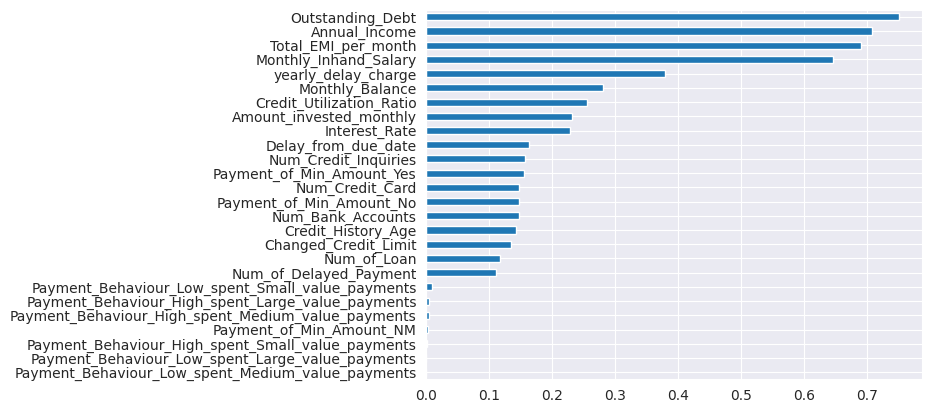

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(x_train, y_train)
feat_improtances = pd.Series(importances, x_train.columns)
feat_improtances = feat_improtances.sort_values()
feat_improtances.plot(kind="barh")
plt.show()

Standardization

In [ ]:
def scale(x):
    scaler = StandardScaler()
    scaler.fit(x)
    scaled_x = scaler.transform(x)
    return scaled_x

In [ ]:
x_train = scale(x_train)
x_test = scale(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=50, n_estimators=50, random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

confusion_matrix(y_test, predictions)
report = classification_report(predictions, y_test)

print(confusion_matrix(y_test, predictions))
print(report)
print(accuracy_score(predictions, y_test))

[[ 9984   110   521]
 [    2 10380   197]
 [ 1470  1210  8031]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     11456
           1       0.98      0.89      0.93     11700
           2       0.75      0.92      0.83      8749

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.89     31905
weighted avg       0.90      0.89      0.89     31905

0.8899858956276445


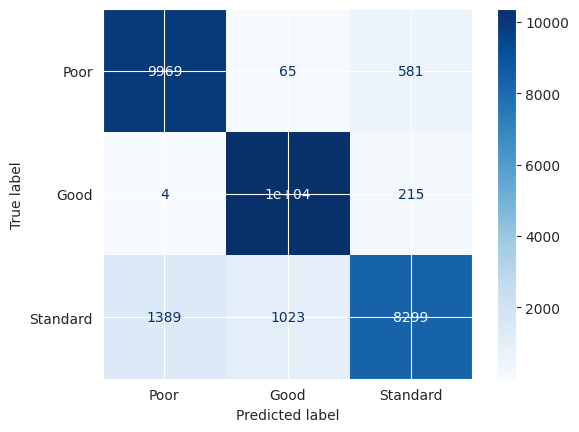

In [ ]:
cm_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=["Poor", "Good", "Standard"])
cm_dis.plot(cmap=plt.cm.Blues)
plt.show()

<Axes: >

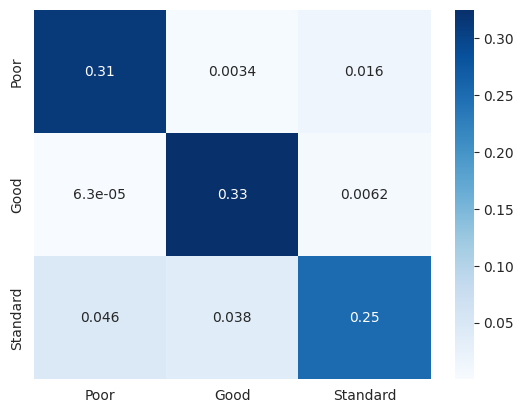

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions)/len(y_test),
            annot=True, cmap='Blues',
            xticklabels=["Poor", "Good", "Standard"],
            yticklabels=["Poor", "Good", "Standard"])

**XGB - Gradient Boosted Trees**

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=50, random_state=0, n_estimators=50,
                            use_label_encoder=False, eval_metric='logloss')

xgb_clf.fit(x_train, y_train)
predictions = xgb_clf.predict(x_test)
confusion_matrix(y_test, predictions)
report = classification_report(predictions, y_test)

print(confusion_matrix(y_test, predictions))
print(report)
print(accuracy_score(predictions, y_test))

[[ 9969    65   581]
 [    4 10360   215]
 [ 1389  1023  8299]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11362
           1       0.98      0.90      0.94     11448
           2       0.77      0.91      0.84      9095

    accuracy                           0.90     31905
   macro avg       0.90      0.90      0.90     31905
weighted avg       0.91      0.90      0.90     31905

0.8972888262027895


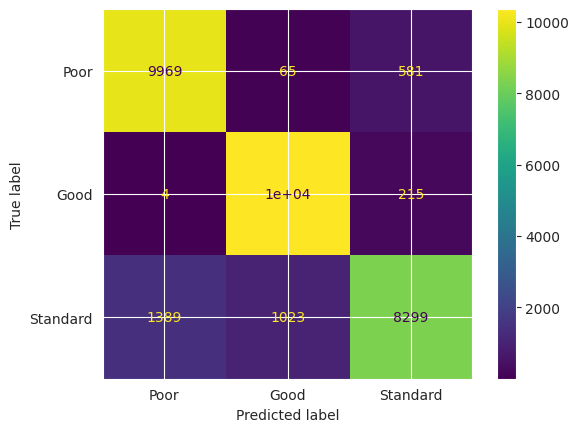

In [ ]:
cm_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=["Poor", "Good", "Standard"])
cm_dis.plot()
plt.show()

<Axes: >

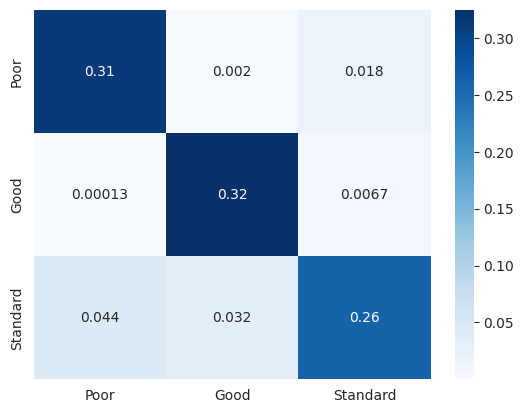

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions)/len(y_test),
            annot=True, cmap='Blues',
            xticklabels=["Poor", "Good", "Standard"],
            yticklabels=["Poor", "Good", "Standard"])